# < 3주차 과제 1 : MLP 마음대로 다뤄보기>
- dataset을 임의로 선정해서 직접 분석 해보기(제공한 코드를 활용해서 해보기)
- activation functions 중 relu사용시 함수 직접 정의
- lr, optimizer 등 바꿔보기
- hidden layer/neuron 수를 바꾸기
- 전처리도 추가
- 모든 시도를 올려주세요!
- 제일 높은 acc를 보인 시도를 명시해주세요!


In [1]:
import torch
from torch import nn, optim
from sklearn.datasets import load_breast_cancer
from torch.utils.data import  TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## 아래 데이터셋 중 원하는 데이터셋 하나를 선택하여, 코드 과제 진행하기!
- 1) load_digits() <br>
- 2) load_wine()

In [2]:
from sklearn import datasets

# 데이터셋 종류 :  load_digits()
# data = load_breast_cancer()
data = datasets.load_digits()

#### 데이터셋 확인

In [3]:
input = data.data
output = data.target

In [4]:
print(input.shape) #(1797, 64)
print(output.shape) #(1797,)
print(data.images.shape)

(1797, 64)
(1797,)
(1797, 8, 8)


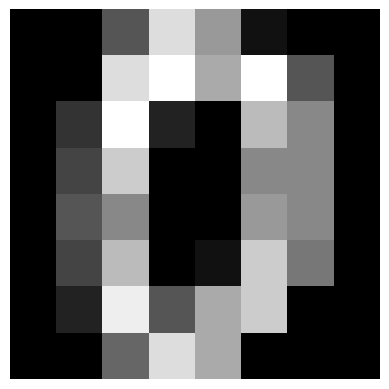

In [6]:
#이미지확인
plt.imshow(input[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.3, random_state = 42, stratify= data.target, shuffle = True)

x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)

# 데이터를 tensor로 바꿔주고 gpu 연산이 가능해지도록 gpu에 옮김
# label 값을 왜 long 에 옮겨놓는가? loss function이 다르기 때문

In [9]:
print(x_train[0]) # 첫번째 이미지의 feature
print(y_train[0]) # 첫번째 이미지 레이블 : 0

tensor([ 0.,  0.,  0., 16., 12.,  1.,  0.,  0.,  0.,  0.,  6., 16., 14.,  7.,
         0.,  0.,  0.,  0., 14., 15.,  1., 11.,  0.,  0.,  0.,  0., 16., 15.,
         0., 14.,  1.,  0.,  0.,  1., 16., 10.,  0., 14.,  2.,  0.,  0.,  0.,
        15., 13.,  3., 15.,  3.,  0.,  0.,  0.,  9., 16., 16., 15.,  0.,  0.,
         0.,  0.,  0., 13., 16.,  8.,  0.,  0.])
tensor(0)


**파이토치에서는** 데이터셋을 좀 더 쉽게 다룰 수 있도록 유용한 도구로서 torch.utils.data.Dataset과 torch.utils.data.DataLoader를 제공합니다. 이를 사용하면 미니 배치 학습, 데이터 셔플(shuffle), 병렬 처리까지 간단히 수행할 수 있습니다. 기본적인 사용 방법은 Dataset을 정의하고, 이를 DataLoader에 전달하는 것
- init : class 에서 객체가 생성되면 바로 실행되는 함수
- len : observation 수를 정의하는 함수
- getitem : iteration 마다 해당하는 데이터를 돌려주는 함수

In [10]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_train
    self.y_data = [[y] for y in y_train]
#  데이터셋의 전처리를 해주는 부분

  def __len__(self):
    return len(self.x_data)
#  데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.LongTensor(self.y_data[idx]).to(device)
#  데이터셋에서 특정 1개의 샘플을 가져오는 함수

    return x,y

In [11]:
batch_size = 256
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=batch_size)

In [12]:
# input_layer와 hidden_layer의 노드 개수를 어떻게 바꿔줘야할까?
# hidden layer/neuron 수를 바꾸기

model = nn.Sequential(
          nn.Linear(64,128, bias=True),
          nn.Sigmoid(),
          nn.Linear(128,15, bias=True),
          nn.Sigmoid(),
          nn.Linear(15,10, bias=True),
          nn.Softmax()
          ).to(device)

#model = nn.Sequential(
         # nn.Linear(입력 데이터의 특성(feature)의 수, 첫_은닉층_노드수, bias=True),  # 입력층 노드 수를 64로 설정
         # nn.Sigmoid(),
         # nn.Linear(첫_은닉층_노드수, 두_번째_은닉층_노드수, bias=True),
         # nn.Sigmoid(),
         # nn.Linear(두_번째_은닉층_노드수, 출력_노드수, bias=True),
         # nn.Softmax(dim=1)  # 클래스 확률을 계산하기 위해 차원 지정
         # ).to(device)

# 1.첫번째 모델
##### 1) Activation function : relu
##### 2) Optimizier : Adam
##### 3) layer 수 : 4개
##### 4) lr : 0.01

## 2.1모델 정의

class로 구현 가능
- init : 초기 생성 함수
- foward : 순전파(입력값 => 예측값 의 과정)

In [31]:
#ReLU
class ReLU(torch.nn.ReLU):
  def forward(self, x):
    return torch.max(torch.zeros_like(x), x)

In [22]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(64,300, bias=True), # input_layer = 64, hidden_layer1 = 300
          #nn.Sigmoid(),
          ReLU(),
          nn.BatchNorm1d(300)
    )
  # activation function 이용
  #   nn.ReLU()
  #   nn.tanH()
  #   https://pytorch.org/docs/stable/nn.html 그 외에도 여기서 확인 가능함
  #   파라미터가 필요하지 않다는 것이 특징

  # batch normazliation 1d, 파라미터 값으로 vector의 길이를 전해줌
  # 추후에 이미지를 다루게 된다면, 그때는 batch normalization 2d를 이용하게 됨
  # 그때는 파라미터 값으로 채널, 가로, 세로 길이를 전달해주게 됨

    self.layer2 = nn.Sequential(
          nn.Linear(300,200, bias=True), # hidden_layer1 = 398, hidden_layer2 = 200
        #nn.Sigmoid()
        ReLU()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(200,50, bias=True), # hidden_layer1 = 200, hidden_layer2 = 50
        #nn.Sigmoid()
        ReLU()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(50, 10, bias=True), # hidden_layer3 = 50, output_layer = 10
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [23]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform_(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [24]:
model = Model().to(device)
model.apply(init_weights)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=64, out_features=300, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=300, out_features=200, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=200, out_features=50, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=50, out_features=10, bias=True)
    (1): Softmax(dim=None)
  )
)

In [25]:
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=64, out_features=300, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=300, out_features=200, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=200, out_features=50, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=50, out_features=10, bias=True)
    (1): Softmax(dim=None)
  )
)


## 3.1모델 훈련

In [26]:
loss_fn  = nn.CrossEntropyLoss().to(device)

# 여러가지 optimizer 시도해보기
# lr 바꿔보기


optimizer = optim.Adam(model.parameters(), lr= 0.01)

# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# sgd 등등

In [27]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0 2.3054139614105225
10 1.6414518356323242
20 1.5602022409439087
30 1.477461338043213
40 1.46550452709198
50 1.4635175466537476
60 1.4624345302581787
70 1.4621706008911133
80 1.462023377418518
90 1.4619293212890625


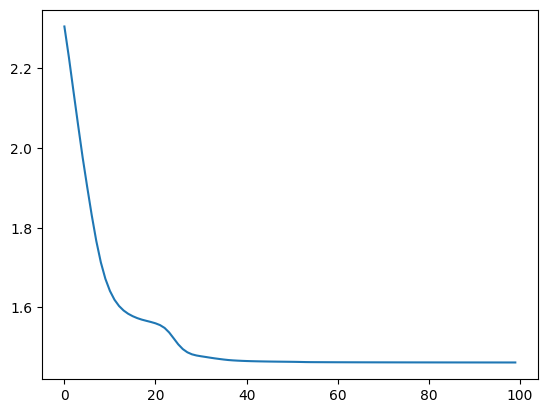

In [28]:
plt.plot(losses)
plt.show()

In [29]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [ ]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [4.3696738e-03 9.9337065e-01 1.5067915e-03 2.7046577e-04 4.8240164e-04]
argmax를 한 후의 output은 1
accuracy는 0.9239766081871345


# 2.두번째 모델
##### 1) Activation function : relu
##### 2) Optimizier : SGD
##### 3) layer 수 : 4개
##### 4) lr : 0.1

## 2.2모델 정의

class로 구현 가능
- init : 초기 생성 함수
- foward : 순전파(입력값 => 예측값 의 과정)

In [40]:
#ReLU
class ReLU(torch.nn.ReLU):
  def forward(self, x):
    return torch.max(torch.zeros_like(x), x)

In [41]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(64,300, bias=True), # input_layer = 64, hidden_layer1 = 300
          #nn.Sigmoid(),
          ReLU(),
          nn.BatchNorm1d(300)
    )
  # activation function 이용
  #   nn.ReLU()
  #   nn.tanH()
  #   https://pytorch.org/docs/stable/nn.html 그 외에도 여기서 확인 가능함
  #   파라미터가 필요하지 않다는 것이 특징

  # batch normazliation 1d, 파라미터 값으로 vector의 길이를 전해줌
  # 추후에 이미지를 다루게 된다면, 그때는 batch normalization 2d를 이용하게 됨
  # 그때는 파라미터 값으로 채널, 가로, 세로 길이를 전달해주게 됨

    self.layer2 = nn.Sequential(
          nn.Linear(300,200, bias=True), # hidden_layer1 = 398, hidden_layer2 = 200
        #nn.Sigmoid()
        ReLU()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(200,50, bias=True), # hidden_layer1 = 200, hidden_layer2 = 50
        #nn.Sigmoid()
        ReLU()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(50, 10, bias=True), # hidden_layer3 = 50, output_layer = 10
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [42]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform_(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [43]:
model = Model().to(device)
model.apply(init_weights)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=64, out_features=300, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=300, out_features=200, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=200, out_features=50, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=50, out_features=10, bias=True)
    (1): Softmax(dim=None)
  )
)

In [44]:
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=64, out_features=300, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=300, out_features=200, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=200, out_features=50, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=50, out_features=10, bias=True)
    (1): Softmax(dim=None)
  )
)


## 3.2모델 훈련

In [45]:
loss_fn  = nn.CrossEntropyLoss().to(device)

# 여러가지 optimizer 시도해보기
# lr 바꿔보기


#optimizer = optim.Adam(model.parameters(), lr= 0.01)

# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# sgd 등등

In [46]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0 2.322160243988037
10 1.8344483375549316
20 1.5800814628601074
30 1.5044708251953125
40 1.4812170267105103
50 1.4729200601577759
60 1.4694788455963135
70 1.4675347805023193
80 1.4664713144302368
90 1.4657554626464844


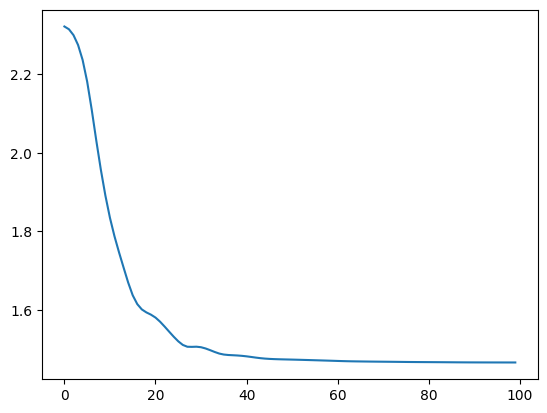

In [47]:
plt.plot(losses)
plt.show()

In [48]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [49]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [4.0917487e-09 9.9883479e-01 6.9145399e-06 5.9836989e-06 3.0534504e-06
 1.5437616e-05 8.8067063e-06 1.7407635e-09 1.1250229e-03 5.6536479e-08]
argmax를 한 후의 output은 1
accuracy는 0.975925925925926


# 3.세번째 모델
##### 1) Activation function : Sigmoid
##### 2) Optimizier : Adam
##### 3) layer 수 : 5개
##### 4) lr : 0.05

## 2.3모델 정의

class로 구현 가능
- init : 초기 생성 함수
- foward : 순전파(입력값 => 예측값 의 과정)

In [50]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(64,300, bias=True), # input_layer = 64, hidden_layer1 = 300
          nn.Sigmoid(),
          #ReLU(),
          nn.BatchNorm1d(300)
    )
  # activation function 이용
  #   nn.ReLU()
  #   nn.tanH()
  #   https://pytorch.org/docs/stable/nn.html 그 외에도 여기서 확인 가능함
  #   파라미터가 필요하지 않다는 것이 특징

  # batch normazliation 1d, 파라미터 값으로 vector의 길이를 전해줌
  # 추후에 이미지를 다루게 된다면, 그때는 batch normalization 2d를 이용하게 됨
  # 그때는 파라미터 값으로 채널, 가로, 세로 길이를 전달해주게 됨

    self.layer2 = nn.Sequential(
          nn.Linear(300,200, bias=True), # hidden_layer1 = 398, hidden_layer2 = 200
        nn.Sigmoid()
        #ReLU()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(200,100, bias=True), # hidden_layer2 = 200, hidden_layer2 = 50
        nn.Sigmoid()
        #ReLU()
    )
    self.layer4 = nn.Sequential(
          nn.Linear(100,50, bias=True), # hidden_layer3 = 100, hidden_layer4 = 50
        nn.Sigmoid()
        #ReLU()
    )
    self.layer5 = nn.Sequential(
        nn.Linear(50, 10, bias=True), # hidden_layer4 = 50, output_layer = 10
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    output = self.layer5(output)
    return output

In [51]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform_(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [52]:
model = Model().to(device)
model.apply(init_weights)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=64, out_features=300, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=300, out_features=200, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=200, out_features=100, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): Sigmoid()
  )
  (layer5): Sequential(
    (0): Linear(in_features=50, out_features=10, bias=True)
    (1): Softmax(dim=None)
  )
)

## 3.3모델 훈련

In [53]:
loss_fn  = nn.CrossEntropyLoss().to(device)

# 여러가지 optimizer 시도해보기
# lr 바꿔보기


optimizer = optim.Adam(model.parameters(), lr= 0.05)

# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
#optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# sgd 등등

In [54]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0 2.304457426071167
10 1.8552782535552979
20 1.7323659658432007
30 1.5780961513519287
40 1.5665569305419922
50 1.5630398988723755
60 1.5633296966552734
70 1.5618292093276978
80 1.561964988708496
90 1.5621623992919922


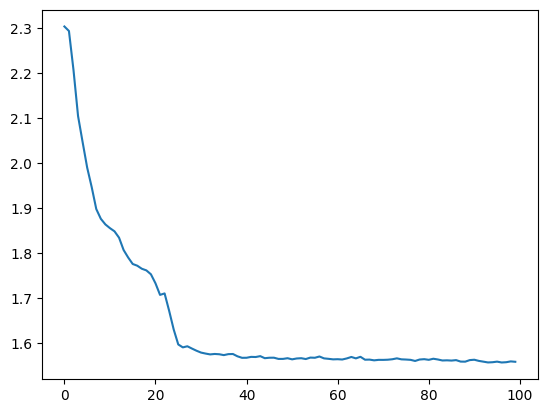

In [55]:
plt.plot(losses)
plt.show()

In [56]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [57]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [2.8432281e-09 9.9991214e-01 4.4956041e-06 2.9786650e-06 7.3196927e-05
 7.5175313e-07 6.0896564e-06 3.2383107e-07 8.9383292e-09 1.0477003e-09]
argmax를 한 후의 output은 1
accuracy는 0.8814814814814815


# 3.네번째 모델
##### 1) Activation function : Sigmoid
##### 2) Optimizier : SGD
##### 3) layer 수 : 4개
##### 4) lr : 0.2

## 2.3모델 정의

class로 구현 가능
- init : 초기 생성 함수
- foward : 순전파(입력값 => 예측값 의 과정)

In [72]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(64,300, bias=True), # input_layer = 64, hidden_layer1 = 300
          nn.Sigmoid(),
          #ReLU(),
          nn.BatchNorm1d(300)
    )
  # activation function 이용
  #   nn.ReLU()
  #   nn.tanH()
  #   https://pytorch.org/docs/stable/nn.html 그 외에도 여기서 확인 가능함
  #   파라미터가 필요하지 않다는 것이 특징

  # batch normazliation 1d, 파라미터 값으로 vector의 길이를 전해줌
  # 추후에 이미지를 다루게 된다면, 그때는 batch normalization 2d를 이용하게 됨
  # 그때는 파라미터 값으로 채널, 가로, 세로 길이를 전달해주게 됨

    self.layer2 = nn.Sequential(
          nn.Linear(300,200, bias=True), # hidden_layer1 = 398, hidden_layer2 = 200
        nn.Sigmoid()
        #ReLU()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(200,100, bias=True), # hidden_layer2 = 200, hidden_layer2 = 50
        nn.Sigmoid()
        #ReLU()
    )

    self.layer4 = nn.Sequential(
        nn.Linear(100, 10, bias=True), # hidden_layer4 = 50, output_layer = 10
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [73]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform_(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [74]:
model = Model().to(device)
model.apply(init_weights)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=64, out_features=300, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=300, out_features=200, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=200, out_features=100, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=100, out_features=10, bias=True)
    (1): Softmax(dim=None)
  )
)

## 3.3모델 훈련

In [90]:
loss_fn  = nn.CrossEntropyLoss().to(device)

# 여러가지 optimizer 시도해보기
# lr 바꿔보기


#optimizer = optim.Adam(model.parameters(), lr= 0.05)

# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=0.9)
# sgd 등등

In [91]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0 1.579978346824646
10 1.5494998693466187
20 1.5143201351165771
30 1.4942295551300049
40 1.4836945533752441
50 1.4774929285049438
60 1.4738132953643799
70 1.4714299440383911
80 1.469846248626709
90 1.4685195684432983


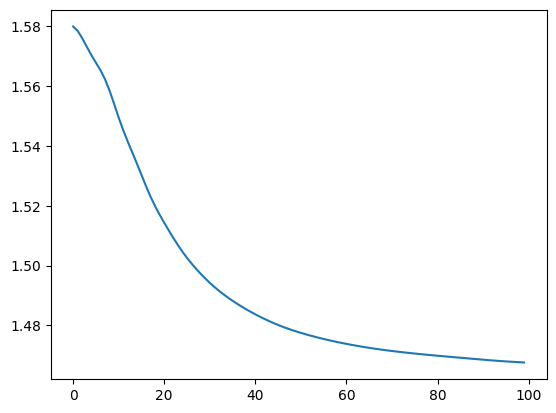

In [92]:
plt.plot(losses)
plt.show()

In [93]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [94]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [1.3947553e-06 9.9753714e-01 7.4281459e-05 1.7567746e-06 3.9705930e-05
 1.5317857e-05 1.0099827e-03 7.2198382e-06 1.3116567e-03 1.5901923e-06]
argmax를 한 후의 output은 1
accuracy는 0.9777777777777777


# 최종 결과
모델1[RELU + ADAM]

accuracy는 0.9239766081871345

----
모델2[RELU + SGD]

accuracy는 0.975925925925926

----

모델3[Sigmoid + ADAM]

accuracy는 0.8814814814814815

----

모델4[Sigmoid + SGD]

accuracy는 0.9777777777777777

# < 3주차 과제 2 : CNN 맛보기>

In [1]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [2]:
# Training settings

batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 175753460.03it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 45849997.66it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 47140519.92it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 20528587.03it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [7]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
    self.mp = nn.MaxPool2d(2)
    self.fc = nn.Linear(320 , 10)

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x)))
    x = F.relu(self.mp(self.conv2(x)))
    x = x.view(in_size, -1)
    x = self.fc(x)
    return F.log_softmax(x)

In [8]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [9]:
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

In [10]:
def test():
    model.eval() #model.eval() 의 기능은?
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [11]:
for epoch in range(1, 10):
    train(epoch)
    test()

<ipython-input-7-006ecbc6c563>:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302332
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.298229
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.301676
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.262216
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.265425
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.208381
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.187509
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.167179
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.114434
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.051374
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.918115
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.760977
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.562535
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.353705
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.031303
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.982493
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.683455
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.646926
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.673146
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.734329
Train Epoch: 1 [12800/60000 (

<ipython-input-10-f52337105c2a>:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.1864, Accuracy: 9447/10000 (94%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.173064
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.030447
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.113774
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.104233
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.156383
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.134238
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.162788
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.289906
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.164436
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.126052
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.145450
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.173237
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.173301
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.256671
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.125322
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.111044
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.146597
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.178909
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.192429
Train Epoch: 2 [12